In [ ]:
# h5 files obtained from Nasa database at:
# https://ladsweb.modaps.eosdis.nasa.gov/

In [37]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,10)

# 01 EXPLORACIÓN DE LOS DATOS

In [38]:
hf = h5py.File('VNP46A1.A2020051.h16v06.001.2020052173141.h5', 'r')

In [39]:
hf.keys()

<KeysViewHDF5 ['HDFEOS', 'HDFEOS INFORMATION']>

In [40]:
hf['HDFEOS INFORMATION']['StructMetadata.0']

<HDF5 dataset "StructMetadata.0": shape (), type "|S32000">

In [41]:
hf['HDFEOS']['GRIDS']['VNP_Grid_DNB']['Data Fields'].keys()

<KeysViewHDF5 ['BrightnessTemperature_M12', 'BrightnessTemperature_M13', 'BrightnessTemperature_M15', 'BrightnessTemperature_M16', 'DNB_At_Sensor_Radiance_500m', 'Glint_Angle', 'Granule', 'Lunar_Azimuth', 'Lunar_Zenith', 'Moon_Illumination_Fraction', 'Moon_Phase_Angle', 'QF_Cloud_Mask', 'QF_DNB', 'QF_VIIRS_M10', 'QF_VIIRS_M11', 'QF_VIIRS_M12', 'QF_VIIRS_M13', 'QF_VIIRS_M15', 'QF_VIIRS_M16', 'Radiance_M10', 'Radiance_M11', 'Sensor_Azimuth', 'Sensor_Zenith', 'Solar_Azimuth', 'Solar_Zenith', 'UTC_Time']>

# 02 EXTRACCIÓN DE IMÁGENES

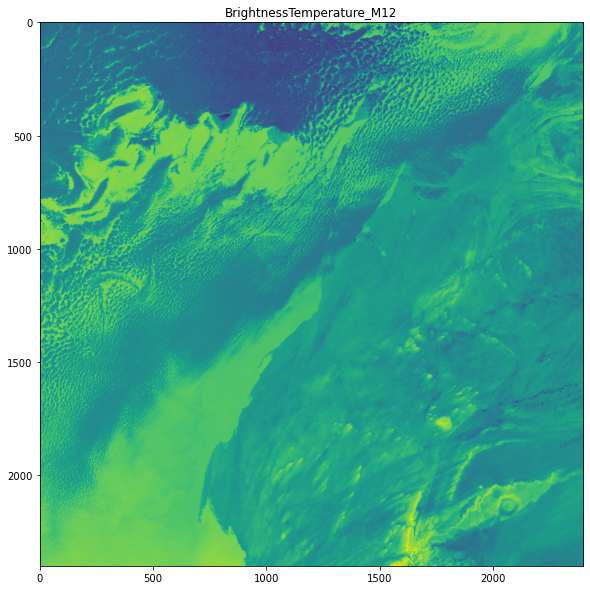

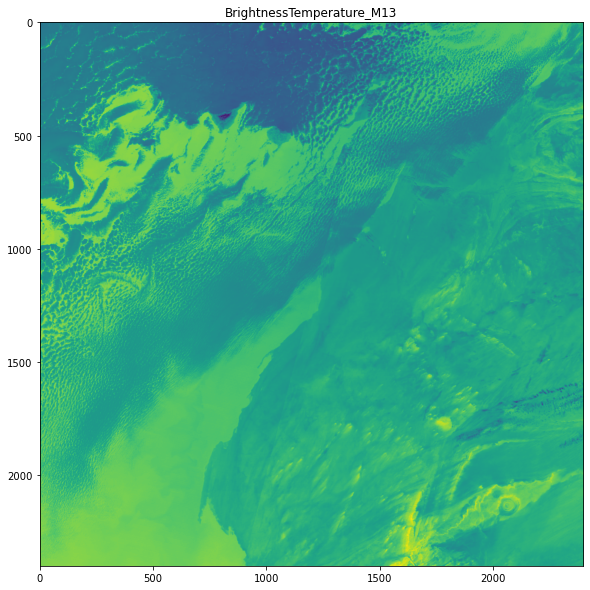

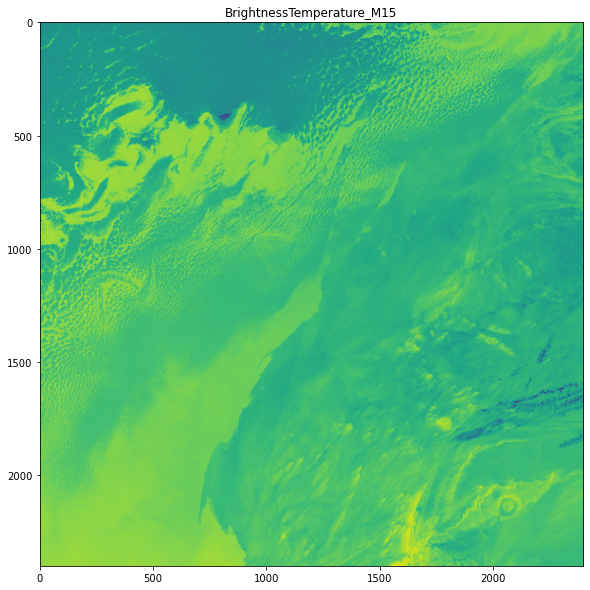

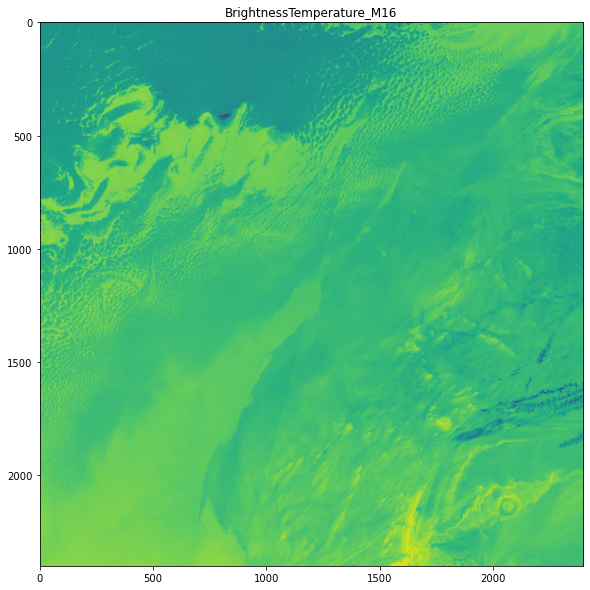

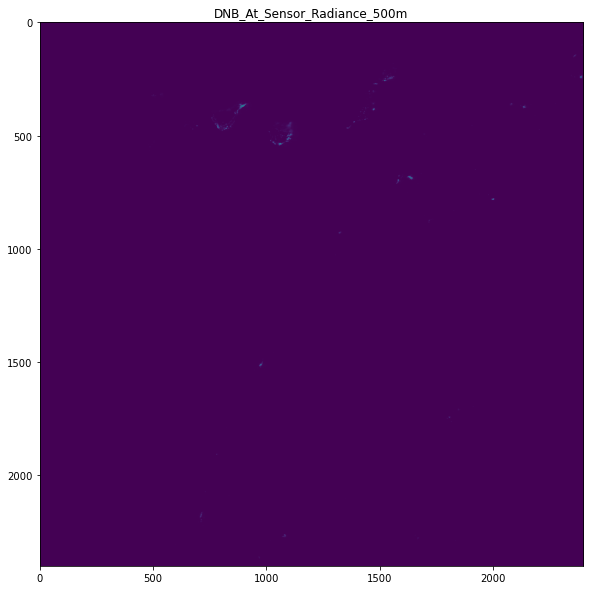

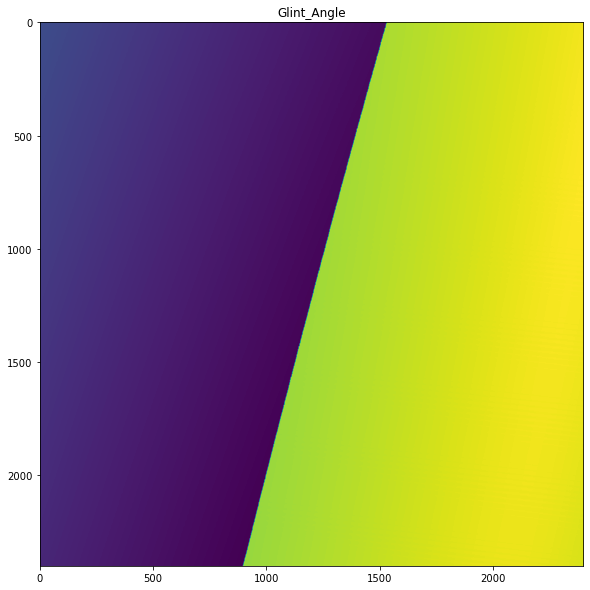

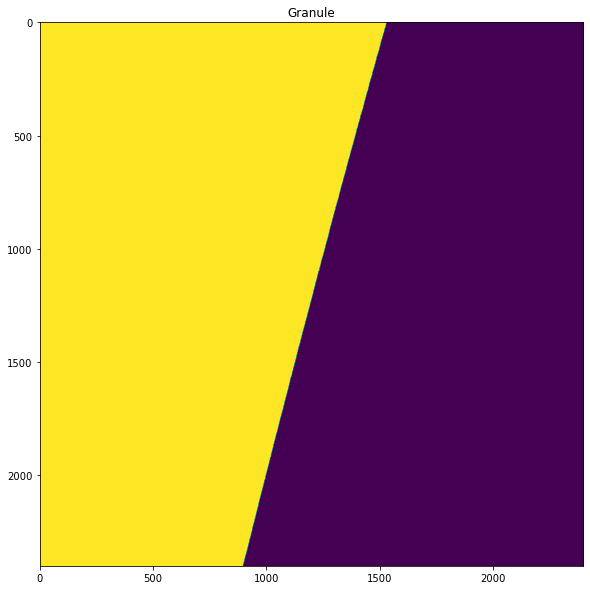

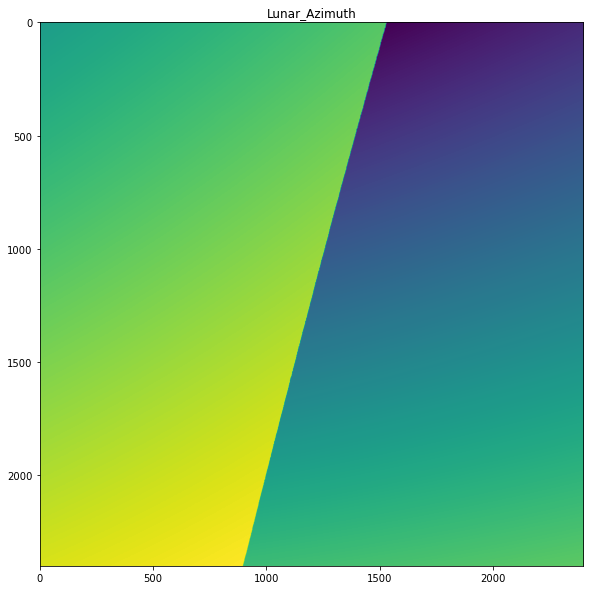

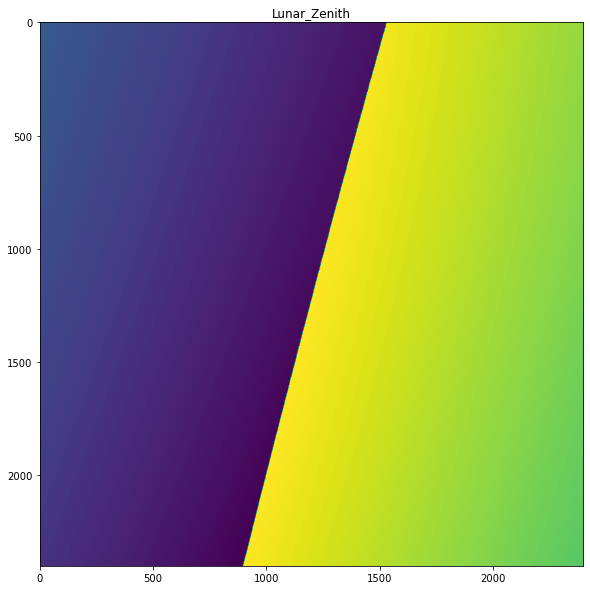

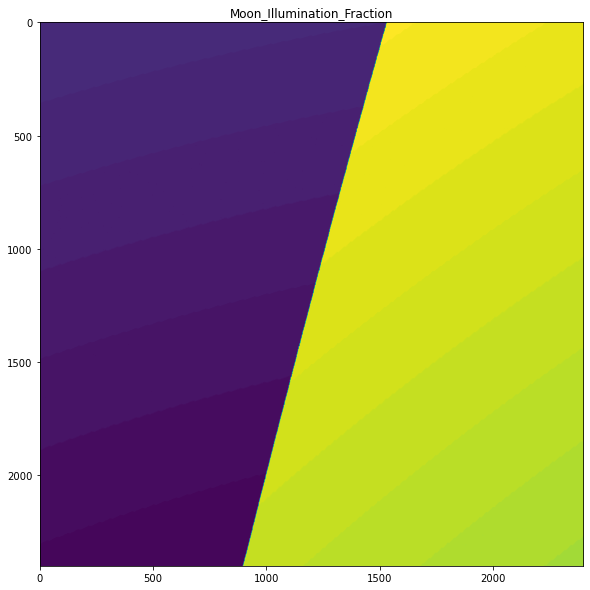

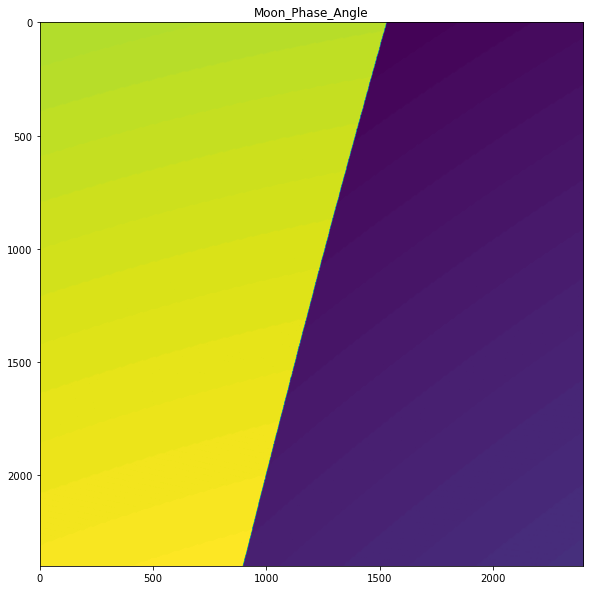

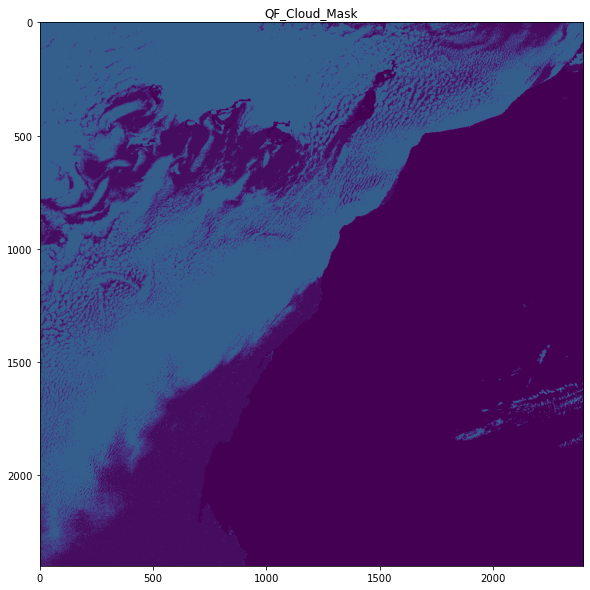

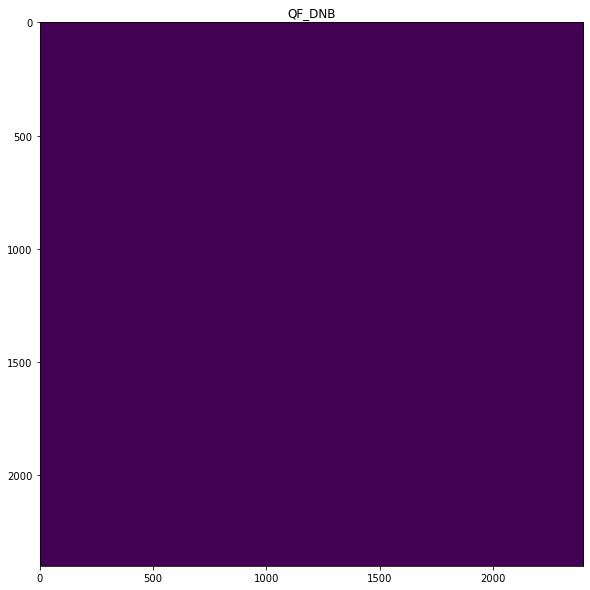

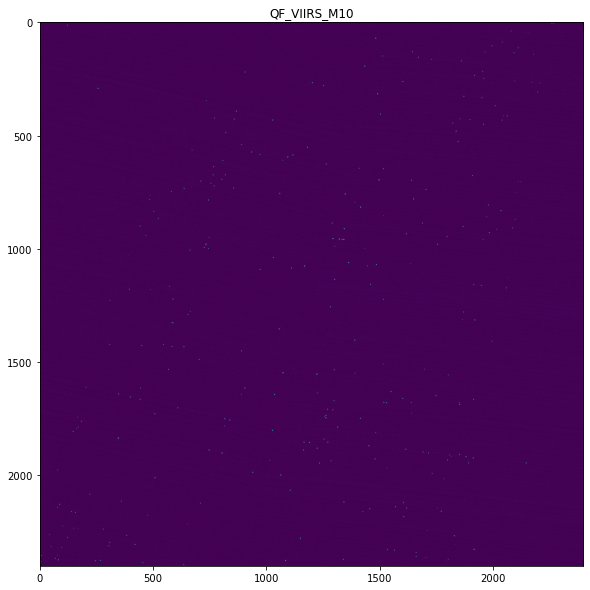

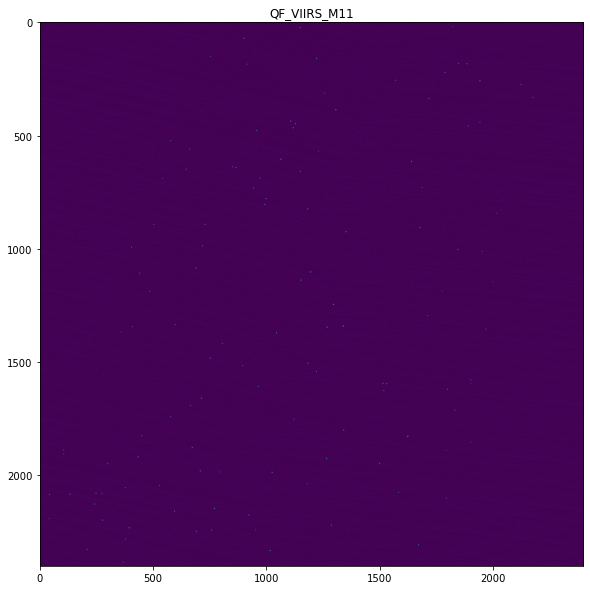

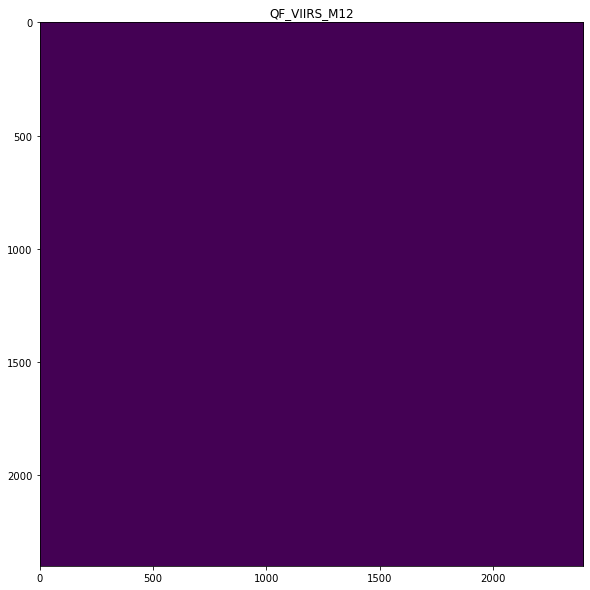

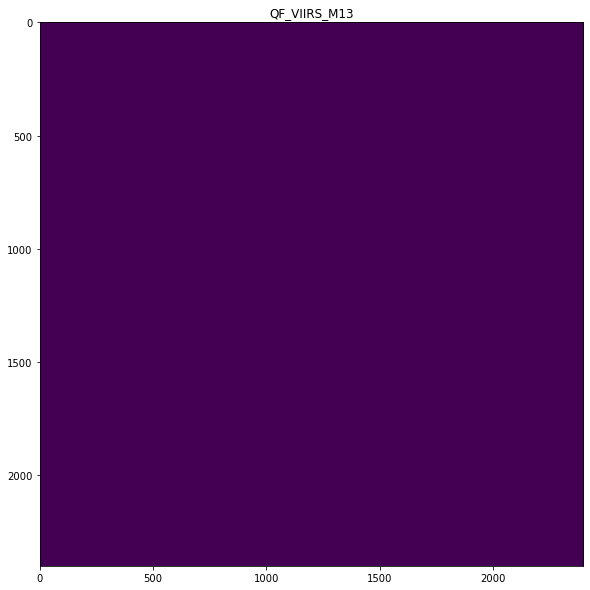

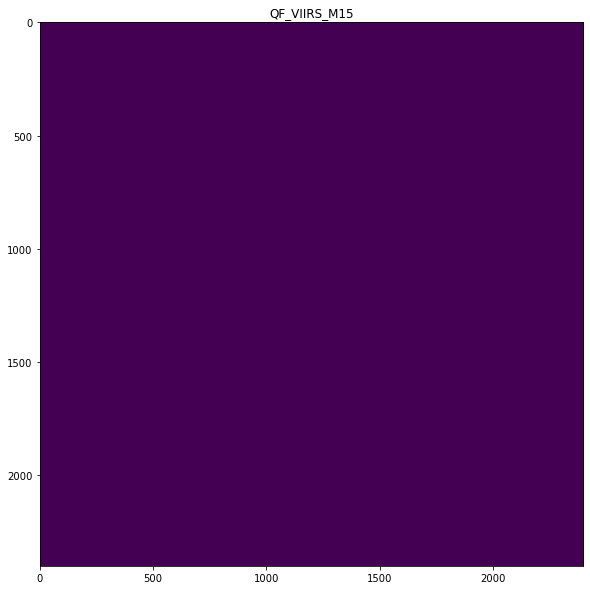

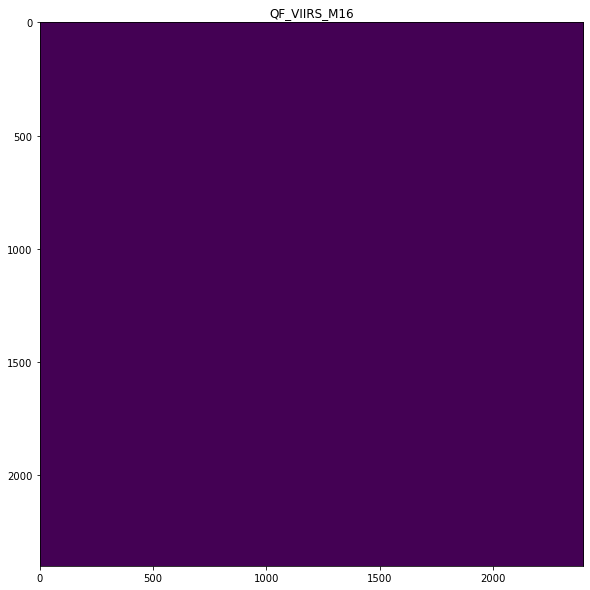

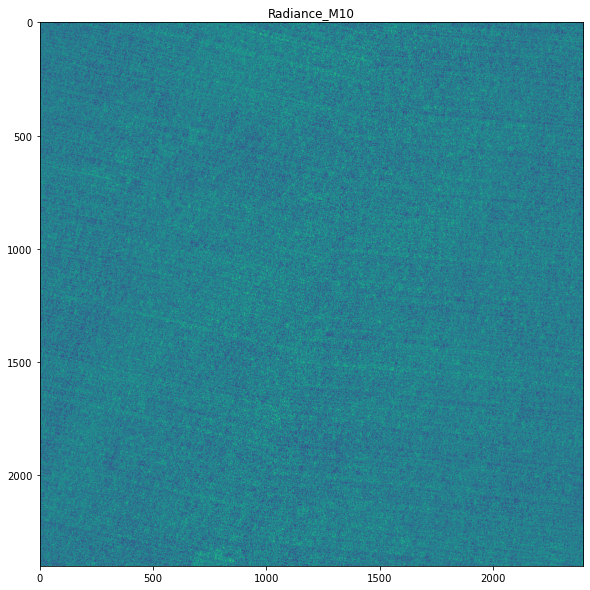

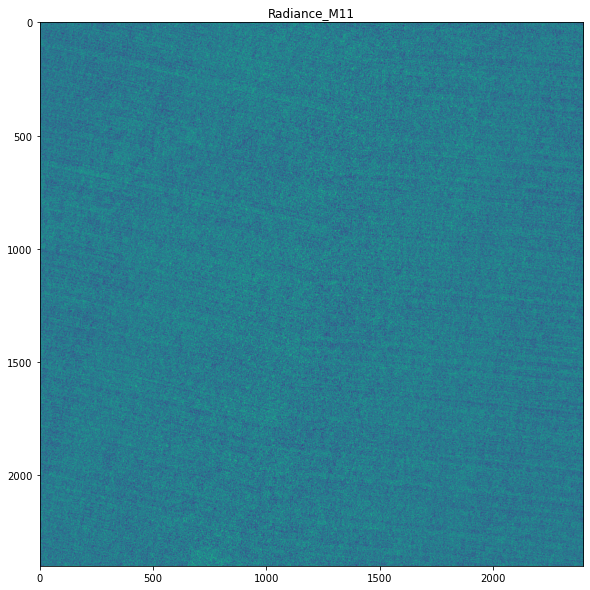

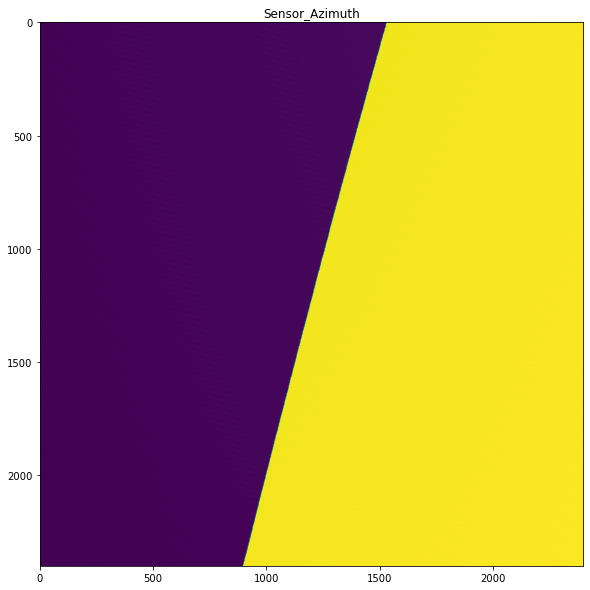

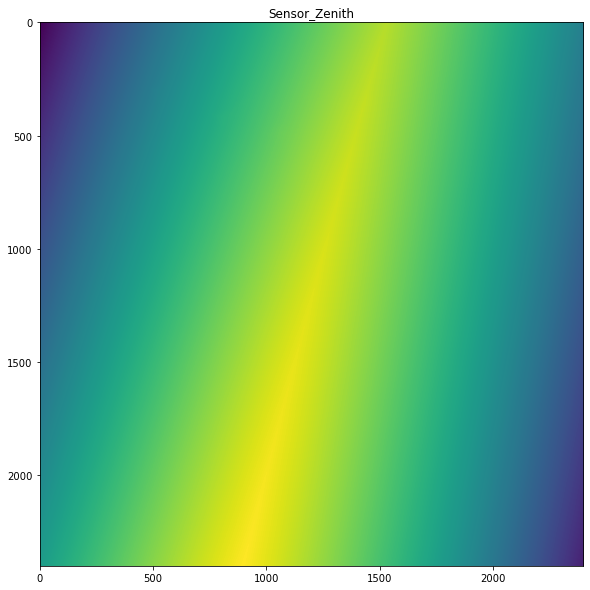

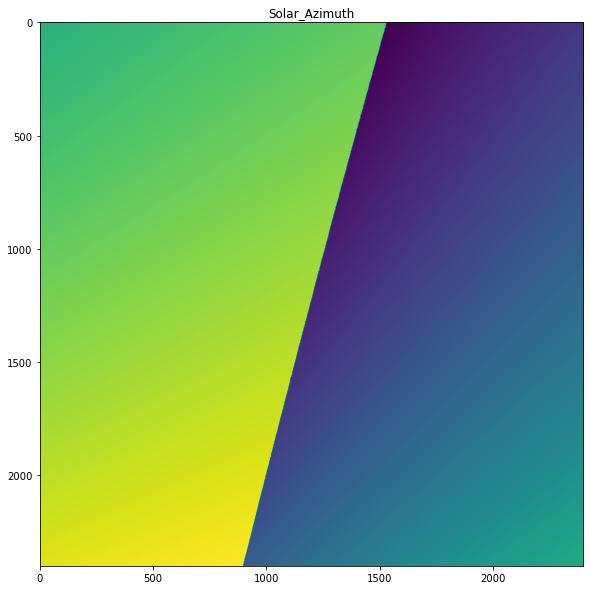

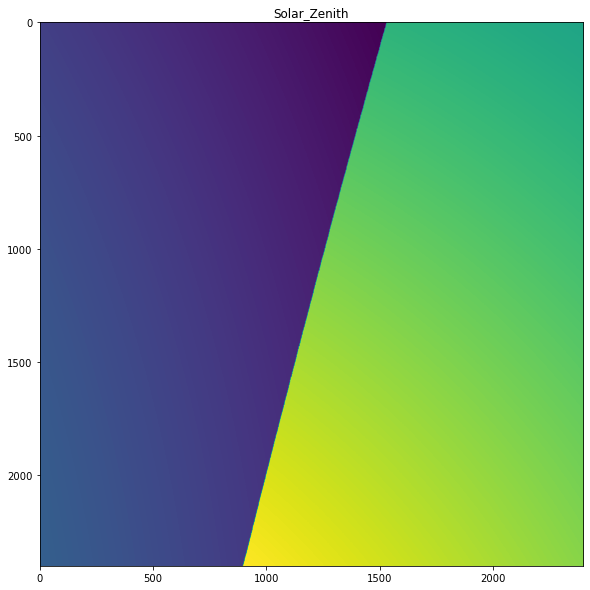

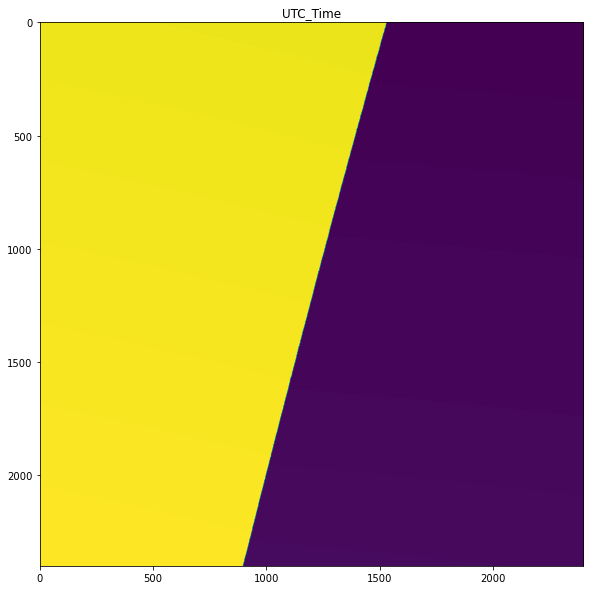

In [42]:
for i in hf['HDFEOS']['GRIDS']['VNP_Grid_DNB']['Data Fields'].keys():
    plt.figure()
    temp = hf['HDFEOS']['GRIDS']['VNP_Grid_DNB']['Data Fields'][i][()]
    plt.imshow(temp) #cmap='binary'
    plt.title(i)
    plt.show()

# 03 GUARDAR IMAGEN

In [33]:
from PIL import Image
from matplotlib import cm


In [34]:
light = hf['HDFEOS']['GRIDS']['VNP_Grid_DNB']['Data Fields']['DNB_At_Sensor_Radiance_500m'][()]

In [35]:
im = Image.fromarray(np.uint8(cm.gist_earth(light)*255))

In [36]:
im.save("light_areas.png")